In [1]:
# IMPORTANTE
# TODO: tentar uma unica variaval para ruptura

# ranqueamento das lojas
# se tiver presenca e eu marquei pontos la em cima, poderia contar como erro.

# Historico
- Rede dupla e/ou com 100 neuronios: ruim. Nos primeiros passos o resultado fica razoavel, mas quando avanca piora.
- Rede unica com 10 neuronios: bom.

In [1]:
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
import sys 
import json
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import math
import collections
import pandas as pd

## for Deep-learing:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.models import model_from_json
from tensorflow.python.keras.callbacks import TensorBoard

from itertools import product
from functools import partial
from time import time

from core.DataExploration import DataExploration
from ruptura.CreateBatch import CreateBatch
from ruptura.RupturaPrediction import RupturaPrediction
from ruptura.RupturaNeuralNetwork import RupturaNeuralNetwork

Using TensorFlow backend.


# CARREGAMENTO DOS DADOS

In [2]:
createBatch = CreateBatch()
X, Y, Ytest = createBatch.batch('barbieri-1-3-19.json')

WARNING - need error handling on samples


# MODEL DEFINITION

In [3]:
#DEFINE THE MODEL
batch_size = 64
time_steps = X.shape[1]
x_dimension = X.shape[2]
modelName = 'model-1-3-19'
rupNN = RupturaNeuralNetwork(modelName)
newModel = False

if newModel:
    n_neurons = 12
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    #model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    #model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    model.compile(
        loss=rupNN.getCustomLoss((batch_size,time_steps)),
        #loss = 'categorical_crossentropy', 
        optimizer='adam')
    print('MODEL CREATED\n')
    print(model.summary())
else:
    model = rupNN.loadModel((batch_size,time_steps))  # Y dimensions are needed for custom loss definitions
    print('MODEL LOADED\n')
    print(model.summary())

MODEL LOADED

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 12)            816       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 4)             52        
Total params: 868
Trainable params: 868
Non-trainable params: 0
_________________________________________________________________
None


# TRAINING

In [5]:
cut1 = batch_size
cut2 = X.shape[0] - X.shape[0]%batch_size
Xval, Xtrain,_ = np.split(X,[cut1,cut2])
Yval, Ytrain,_ = np.split(Y,[cut1,cut2])

for step in range(30):
    n_epoch = 100
    model.fit(Xtrain, Ytrain, 
                  epochs=n_epoch, 
                  batch_size= batch_size, 
                  validation_data=(Xval, Yval),
                  verbose=2)
    rupNN.saveModel(model)

Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 7s - loss: 0.3641 - val_loss: 0.4704
Epoch 2/100
 - 5s - loss: 0.3396 - val_loss: 0.4479
Epoch 3/100
 - 5s - loss: 0.3201 - val_loss: 0.4392
Epoch 4/100
 - 5s - loss: 0.3102 - val_loss: 0.4240
Epoch 5/100
 - 5s - loss: 0.3012 - val_loss: 0.4071
Epoch 6/100
 - 5s - loss: 0.2939 - val_loss: 0.3962
Epoch 7/100
 - 5s - loss: 0.2891 - val_loss: 0.3865
Epoch 8/100
 - 5s - loss: 0.2851 - val_loss: 0.3782
Epoch 9/100
 - 5s - loss: 0.2821 - val_loss: 0.3718
Epoch 10/100
 - 5s - loss: 0.2796 - val_loss: 0.3670
Epoch 11/100
 - 5s - loss: 0.2775 - val_loss: 0.3641
Epoch 12/100
 - 5s - loss: 0.2757 - val_loss: 0.3613
Epoch 13/100
 - 5s - loss: 0.2738 - val_loss: 0.3578
Epoch 14/100
 - 5s - loss: 0.2720 - val_loss: 0.3545
Epoch 15/100
 - 5s - loss: 0.2703 - val_loss: 0.3527
Epoch 16/100
 - 5s - loss: 0.2689 - val_loss: 0.3512
Epoch 17/100
 - 5s - loss: 0.2683 - val_loss: 0.3497
Epoch 18/100
 - 5s - loss: 0.2663 - val_loss: 0.3489
Epoch 19/

 - 5s - loss: 0.2343 - val_loss: 0.3127
Epoch 55/100
 - 5s - loss: 0.2343 - val_loss: 0.3117
Epoch 56/100
 - 5s - loss: 0.2344 - val_loss: 0.3128
Epoch 57/100
 - 5s - loss: 0.2340 - val_loss: 0.3119
Epoch 58/100
 - 5s - loss: 0.2339 - val_loss: 0.3131
Epoch 59/100
 - 5s - loss: 0.2339 - val_loss: 0.3127
Epoch 60/100
 - 5s - loss: 0.2346 - val_loss: 0.3129
Epoch 61/100
 - 5s - loss: 0.2341 - val_loss: 0.3120
Epoch 62/100
 - 5s - loss: 0.2339 - val_loss: 0.3119
Epoch 63/100
 - 5s - loss: 0.2340 - val_loss: 0.3122
Epoch 64/100
 - 5s - loss: 0.2345 - val_loss: 0.3123
Epoch 65/100
 - 5s - loss: 0.2336 - val_loss: 0.3115
Epoch 66/100
 - 5s - loss: 0.2336 - val_loss: 0.3117
Epoch 67/100
 - 5s - loss: 0.2335 - val_loss: 0.3117
Epoch 68/100
 - 5s - loss: 0.2334 - val_loss: 0.3115
Epoch 69/100
 - 5s - loss: 0.2334 - val_loss: 0.3118
Epoch 70/100
 - 5s - loss: 0.2334 - val_loss: 0.3119
Epoch 71/100
 - 5s - loss: 0.2334 - val_loss: 0.3112
Epoch 72/100
 - 5s - loss: 0.2332 - val_loss: 0.3113
Epoch 

Epoch 8/100
 - 5s - loss: 0.2281 - val_loss: 0.3078
Epoch 9/100
 - 5s - loss: 0.2279 - val_loss: 0.3075
Epoch 10/100
 - 5s - loss: 0.2283 - val_loss: 0.3085
Epoch 11/100
 - 5s - loss: 0.2286 - val_loss: 0.3097
Epoch 12/100
 - 5s - loss: 0.2285 - val_loss: 0.3073
Epoch 13/100
 - 5s - loss: 0.2279 - val_loss: 0.3072
Epoch 14/100
 - 5s - loss: 0.2280 - val_loss: 0.3074
Epoch 15/100
 - 5s - loss: 0.2279 - val_loss: 0.3117
Epoch 16/100
 - 5s - loss: 0.2281 - val_loss: 0.3080
Epoch 17/100
 - 5s - loss: 0.2279 - val_loss: 0.3075
Epoch 18/100
 - 5s - loss: 0.2276 - val_loss: 0.3073
Epoch 19/100
 - 5s - loss: 0.2282 - val_loss: 0.3076
Epoch 20/100
 - 5s - loss: 0.2277 - val_loss: 0.3081
Epoch 21/100
 - 5s - loss: 0.2284 - val_loss: 0.3072
Epoch 22/100
 - 5s - loss: 0.2289 - val_loss: 0.3074
Epoch 23/100
 - 5s - loss: 0.2284 - val_loss: 0.3071
Epoch 24/100
 - 5s - loss: 0.2278 - val_loss: 0.3071
Epoch 25/100
 - 5s - loss: 0.2277 - val_loss: 0.3070
Epoch 26/100
 - 5s - loss: 0.2275 - val_loss: 0.

Epoch 62/100
 - 5s - loss: 0.2275 - val_loss: 0.3049
Epoch 63/100
 - 5s - loss: 0.2271 - val_loss: 0.3046
Epoch 64/100
 - 5s - loss: 0.2270 - val_loss: 0.3049
Epoch 65/100
 - 5s - loss: 0.2270 - val_loss: 0.3045
Epoch 66/100
 - 5s - loss: 0.2268 - val_loss: 0.3040
Epoch 67/100
 - 5s - loss: 0.2266 - val_loss: 0.3042
Epoch 68/100
 - 5s - loss: 0.2265 - val_loss: 0.3037
Epoch 69/100
 - 5s - loss: 0.2266 - val_loss: 0.3047
Epoch 70/100
 - 5s - loss: 0.2262 - val_loss: 0.3034
Epoch 71/100
 - 5s - loss: 0.2261 - val_loss: 0.3043
Epoch 72/100
 - 5s - loss: 0.2261 - val_loss: 0.3040
Epoch 73/100
 - 5s - loss: 0.2261 - val_loss: 0.3032
Epoch 74/100
 - 5s - loss: 0.2259 - val_loss: 0.3033
Epoch 75/100
 - 5s - loss: 0.2256 - val_loss: 0.3033
Epoch 76/100
 - 5s - loss: 0.2254 - val_loss: 0.3032
Epoch 77/100
 - 5s - loss: 0.2255 - val_loss: 0.3029
Epoch 78/100
 - 5s - loss: 0.2253 - val_loss: 0.3036
Epoch 79/100
 - 5s - loss: 0.2253 - val_loss: 0.3043
Epoch 80/100
 - 5s - loss: 0.2251 - val_loss: 

 - 5s - loss: 0.2172 - val_loss: 0.2952
Epoch 16/100
 - 5s - loss: 0.2174 - val_loss: 0.2956
Epoch 17/100
 - 5s - loss: 0.2173 - val_loss: 0.2957
Epoch 18/100
 - 5s - loss: 0.2171 - val_loss: 0.2955
Epoch 19/100
 - 5s - loss: 0.2170 - val_loss: 0.2954
Epoch 20/100
 - 5s - loss: 0.2174 - val_loss: 0.2951
Epoch 21/100
 - 5s - loss: 0.2175 - val_loss: 0.2955
Epoch 22/100
 - 5s - loss: 0.2170 - val_loss: 0.2949
Epoch 23/100
 - 5s - loss: 0.2171 - val_loss: 0.2965
Epoch 24/100
 - 5s - loss: 0.2173 - val_loss: 0.2956
Epoch 25/100
 - 5s - loss: 0.2168 - val_loss: 0.2952
Epoch 26/100
 - 5s - loss: 0.2171 - val_loss: 0.2942
Epoch 27/100
 - 5s - loss: 0.2169 - val_loss: 0.2955
Epoch 28/100
 - 5s - loss: 0.2171 - val_loss: 0.2964
Epoch 29/100
 - 5s - loss: 0.2170 - val_loss: 0.2953
Epoch 30/100
 - 5s - loss: 0.2169 - val_loss: 0.2948
Epoch 31/100
 - 5s - loss: 0.2169 - val_loss: 0.2943
Epoch 32/100
 - 5s - loss: 0.2164 - val_loss: 0.2955
Epoch 33/100
 - 5s - loss: 0.2166 - val_loss: 0.2944
Epoch 

 - 5s - loss: 0.2114 - val_loss: 0.2889
Epoch 70/100
 - 5s - loss: 0.2112 - val_loss: 0.2892
Epoch 71/100
 - 5s - loss: 0.2117 - val_loss: 0.2891
Epoch 72/100
 - 5s - loss: 0.2111 - val_loss: 0.2887
Epoch 73/100
 - 5s - loss: 0.2118 - val_loss: 0.2895
Epoch 74/100
 - 5s - loss: 0.2119 - val_loss: 0.2882
Epoch 75/100
 - 5s - loss: 0.2111 - val_loss: 0.2888
Epoch 76/100
 - 5s - loss: 0.2112 - val_loss: 0.2879
Epoch 77/100
 - 5s - loss: 0.2109 - val_loss: 0.2888
Epoch 78/100
 - 5s - loss: 0.2111 - val_loss: 0.2884
Epoch 79/100
 - 5s - loss: 0.2110 - val_loss: 0.2883
Epoch 80/100
 - 5s - loss: 0.2110 - val_loss: 0.2891
Epoch 81/100
 - 5s - loss: 0.2112 - val_loss: 0.2879
Epoch 82/100
 - 5s - loss: 0.2108 - val_loss: 0.2883
Epoch 83/100
 - 5s - loss: 0.2110 - val_loss: 0.2882
Epoch 84/100
 - 5s - loss: 0.2108 - val_loss: 0.2883
Epoch 85/100
 - 5s - loss: 0.2106 - val_loss: 0.2880
Epoch 86/100
 - 5s - loss: 0.2110 - val_loss: 0.2932
Epoch 87/100
 - 5s - loss: 0.2111 - val_loss: 0.2883
Epoch 

Epoch 23/100
 - 5s - loss: 0.2066 - val_loss: 0.2827
Epoch 24/100
 - 5s - loss: 0.2070 - val_loss: 0.2837
Epoch 25/100
 - 5s - loss: 0.2070 - val_loss: 0.2829
Epoch 26/100
 - 5s - loss: 0.2064 - val_loss: 0.2824
Epoch 27/100
 - 5s - loss: 0.2068 - val_loss: 0.2831
Epoch 28/100
 - 5s - loss: 0.2066 - val_loss: 0.2829
Epoch 29/100
 - 5s - loss: 0.2064 - val_loss: 0.2828
Epoch 30/100
 - 5s - loss: 0.2066 - val_loss: 0.2822
Epoch 31/100
 - 5s - loss: 0.2069 - val_loss: 0.2818
Epoch 32/100
 - 5s - loss: 0.2204 - val_loss: 0.3075
Epoch 33/100
 - 5s - loss: 0.2235 - val_loss: 0.2967
Epoch 34/100
 - 5s - loss: 0.2140 - val_loss: 0.2898
Epoch 35/100
 - 5s - loss: 0.2108 - val_loss: 0.2884
Epoch 36/100
 - 5s - loss: 0.2096 - val_loss: 0.2856
Epoch 37/100
 - 5s - loss: 0.2086 - val_loss: 0.2849
Epoch 38/100
 - 5s - loss: 0.2081 - val_loss: 0.2854
Epoch 39/100
 - 5s - loss: 0.2079 - val_loss: 0.2837
Epoch 40/100
 - 5s - loss: 0.2077 - val_loss: 0.2838
Epoch 41/100
 - 5s - loss: 0.2076 - val_loss: 

Epoch 77/100
 - 5s - loss: 0.2043 - val_loss: 0.2786
Epoch 78/100
 - 5s - loss: 0.2038 - val_loss: 0.2787
Epoch 79/100
 - 5s - loss: 0.2054 - val_loss: 0.2793
Epoch 80/100
 - 5s - loss: 0.2049 - val_loss: 0.2793
Epoch 81/100
 - 5s - loss: 0.2040 - val_loss: 0.2793
Epoch 82/100
 - 5s - loss: 0.2042 - val_loss: 0.2792
Epoch 83/100
 - 5s - loss: 0.2043 - val_loss: 0.2784
Epoch 84/100
 - 5s - loss: 0.2036 - val_loss: 0.2782
Epoch 85/100
 - 5s - loss: 0.2036 - val_loss: 0.2789
Epoch 86/100
 - 5s - loss: 0.2038 - val_loss: 0.2781
Epoch 87/100
 - 5s - loss: 0.2039 - val_loss: 0.2779
Epoch 88/100
 - 5s - loss: 0.2035 - val_loss: 0.2780
Epoch 89/100
 - 5s - loss: 0.2036 - val_loss: 0.2791
Epoch 90/100
 - 5s - loss: 0.2040 - val_loss: 0.2780
Epoch 91/100
 - 5s - loss: 0.2038 - val_loss: 0.2795
Epoch 92/100
 - 5s - loss: 0.2043 - val_loss: 0.2780
Epoch 93/100
 - 5s - loss: 0.2033 - val_loss: 0.2787
Epoch 94/100
 - 5s - loss: 0.2038 - val_loss: 0.2784
Epoch 95/100
 - 5s - loss: 0.2039 - val_loss: 

 - 5s - loss: 0.2030 - val_loss: 0.2765
Epoch 31/100
 - 5s - loss: 0.2011 - val_loss: 0.2775
Epoch 32/100
 - 5s - loss: 0.2012 - val_loss: 0.2777
Epoch 33/100
 - 5s - loss: 0.2014 - val_loss: 0.2756
Epoch 34/100
 - 5s - loss: 0.2013 - val_loss: 0.2774
Epoch 35/100
 - 5s - loss: 0.2031 - val_loss: 0.2789
Epoch 36/100
 - 5s - loss: 0.2022 - val_loss: 0.2774
Epoch 37/100
 - 5s - loss: 0.2010 - val_loss: 0.2772
Epoch 38/100
 - 5s - loss: 0.2014 - val_loss: 0.2774
Epoch 39/100
 - 5s - loss: 0.2015 - val_loss: 0.2763
Epoch 40/100
 - 5s - loss: 0.2009 - val_loss: 0.2766
Epoch 41/100
 - 5s - loss: 0.2009 - val_loss: 0.2760
Epoch 42/100
 - 5s - loss: 0.2008 - val_loss: 0.2759
Epoch 43/100
 - 5s - loss: 0.2009 - val_loss: 0.2753
Epoch 44/100
 - 5s - loss: 0.2008 - val_loss: 0.2755
Epoch 45/100
 - 5s - loss: 0.2008 - val_loss: 0.2784
Epoch 46/100
 - 5s - loss: 0.2013 - val_loss: 0.2772
Epoch 47/100
 - 5s - loss: 0.2009 - val_loss: 0.2759
Epoch 48/100
 - 5s - loss: 0.2008 - val_loss: 0.2752
Epoch 

 - 5s - loss: 0.1989 - val_loss: 0.2743
Epoch 85/100
 - 5s - loss: 0.1990 - val_loss: 0.2740
Epoch 86/100
 - 5s - loss: 0.1993 - val_loss: 0.2761
Epoch 87/100
 - 5s - loss: 0.1995 - val_loss: 0.2751
Epoch 88/100
 - 5s - loss: 0.1988 - val_loss: 0.2756
Epoch 89/100
 - 5s - loss: 0.1990 - val_loss: 0.2749
Epoch 90/100
 - 5s - loss: 0.1989 - val_loss: 0.2736
Epoch 91/100
 - 5s - loss: 0.1991 - val_loss: 0.2773
Epoch 92/100
 - 5s - loss: 0.2001 - val_loss: 0.2765
Epoch 93/100
 - 5s - loss: 0.1993 - val_loss: 0.2751
Epoch 94/100
 - 5s - loss: 0.1992 - val_loss: 0.2732
Epoch 95/100
 - 5s - loss: 0.1996 - val_loss: 0.2752
Epoch 96/100
 - 5s - loss: 0.2036 - val_loss: 0.2754
Epoch 97/100
 - 5s - loss: 0.1998 - val_loss: 0.2758
Epoch 98/100
 - 5s - loss: 0.1992 - val_loss: 0.2742
Epoch 99/100
 - 5s - loss: 0.1992 - val_loss: 0.2746
Epoch 100/100
 - 5s - loss: 0.1991 - val_loss: 0.2746
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.1992 - val_loss: 0.2753
Epoch 2/100
 

Epoch 38/100
 - 5s - loss: 0.1975 - val_loss: 0.2744
Epoch 39/100
 - 5s - loss: 0.1980 - val_loss: 0.2732
Epoch 40/100
 - 5s - loss: 0.1974 - val_loss: 0.2730
Epoch 41/100
 - 5s - loss: 0.1973 - val_loss: 0.2724
Epoch 42/100
 - 5s - loss: 0.1971 - val_loss: 0.2737
Epoch 43/100
 - 5s - loss: 0.1972 - val_loss: 0.2724
Epoch 44/100
 - 5s - loss: 0.1970 - val_loss: 0.2721
Epoch 45/100
 - 5s - loss: 0.1979 - val_loss: 0.2748
Epoch 46/100
 - 5s - loss: 0.1980 - val_loss: 0.2719
Epoch 47/100
 - 5s - loss: 0.1973 - val_loss: 0.2747
Epoch 48/100
 - 5s - loss: 0.1991 - val_loss: 0.2739
Epoch 49/100
 - 5s - loss: 0.1981 - val_loss: 0.2720
Epoch 50/100
 - 5s - loss: 0.1970 - val_loss: 0.2733
Epoch 51/100
 - 5s - loss: 0.1972 - val_loss: 0.2726
Epoch 52/100
 - 5s - loss: 0.1972 - val_loss: 0.2735
Epoch 53/100
 - 5s - loss: 0.1970 - val_loss: 0.2749
Epoch 54/100
 - 5s - loss: 0.2015 - val_loss: 0.2845
Epoch 55/100
 - 5s - loss: 0.2009 - val_loss: 0.2730
Epoch 56/100
 - 5s - loss: 0.1981 - val_loss: 

Epoch 92/100
 - 5s - loss: 0.1962 - val_loss: 0.2724
Epoch 93/100
 - 5s - loss: 0.1959 - val_loss: 0.2730
Epoch 94/100
 - 5s - loss: 0.1959 - val_loss: 0.2723
Epoch 95/100
 - 5s - loss: 0.1963 - val_loss: 0.2722
Epoch 96/100
 - 5s - loss: 0.1963 - val_loss: 0.2722
Epoch 97/100
 - 5s - loss: 0.1973 - val_loss: 0.2726
Epoch 98/100
 - 5s - loss: 0.1984 - val_loss: 0.2727
Epoch 99/100
 - 5s - loss: 0.1965 - val_loss: 0.2711
Epoch 100/100
 - 5s - loss: 0.1965 - val_loss: 0.2732
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.1960 - val_loss: 0.2731
Epoch 2/100
 - 5s - loss: 0.1959 - val_loss: 0.2729
Epoch 3/100
 - 5s - loss: 0.1964 - val_loss: 0.2718
Epoch 4/100
 - 5s - loss: 0.1966 - val_loss: 0.2728
Epoch 5/100
 - 5s - loss: 0.1964 - val_loss: 0.2721
Epoch 6/100
 - 5s - loss: 0.1961 - val_loss: 0.2743
Epoch 7/100
 - 5s - loss: 0.1961 - val_loss: 0.2728
Epoch 8/100
 - 5s - loss: 0.1963 - val_loss: 0.2726
Epoch 9/100
 - 5s - loss: 0.1959 - val_loss: 0.2715
Epoch 10

 - 5s - loss: 0.1955 - val_loss: 0.2718
Epoch 46/100
 - 5s - loss: 0.1951 - val_loss: 0.2719
Epoch 47/100
 - 5s - loss: 0.1954 - val_loss: 0.2735
Epoch 48/100
 - 5s - loss: 0.1950 - val_loss: 0.2728
Epoch 49/100
 - 5s - loss: 0.1953 - val_loss: 0.2730
Epoch 50/100
 - 5s - loss: 0.1973 - val_loss: 0.2726
Epoch 51/100
 - 5s - loss: 0.1989 - val_loss: 0.2773
Epoch 52/100
 - 5s - loss: 0.1973 - val_loss: 0.2717
Epoch 53/100
 - 5s - loss: 0.1954 - val_loss: 0.2731
Epoch 54/100
 - 5s - loss: 0.1950 - val_loss: 0.2730
Epoch 55/100
 - 5s - loss: 0.1952 - val_loss: 0.2716
Epoch 56/100
 - 5s - loss: 0.1948 - val_loss: 0.2729
Epoch 57/100
 - 5s - loss: 0.1948 - val_loss: 0.2734
Epoch 58/100
 - 5s - loss: 0.1963 - val_loss: 0.2721
Epoch 59/100
 - 5s - loss: 0.1953 - val_loss: 0.2727
Epoch 60/100
 - 5s - loss: 0.1956 - val_loss: 0.2747
Epoch 61/100
 - 5s - loss: 0.1955 - val_loss: 0.2718
Epoch 62/100
 - 5s - loss: 0.1950 - val_loss: 0.2727
Epoch 63/100
 - 5s - loss: 0.1950 - val_loss: 0.2730
Epoch 

 - 5s - loss: 0.1949 - val_loss: 0.2730
Epoch 100/100
 - 5s - loss: 0.1948 - val_loss: 0.2729
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.1952 - val_loss: 0.2743
Epoch 2/100
 - 5s - loss: 0.1951 - val_loss: 0.2732
Epoch 3/100
 - 5s - loss: 0.1946 - val_loss: 0.2742
Epoch 4/100
 - 5s - loss: 0.1945 - val_loss: 0.2732
Epoch 5/100
 - 5s - loss: 0.1942 - val_loss: 0.2735
Epoch 6/100
 - 5s - loss: 0.1942 - val_loss: 0.2741
Epoch 7/100
 - 5s - loss: 0.1944 - val_loss: 0.2732
Epoch 8/100
 - 5s - loss: 0.1945 - val_loss: 0.2735
Epoch 9/100
 - 5s - loss: 0.1945 - val_loss: 0.2731
Epoch 10/100
 - 5s - loss: 0.1945 - val_loss: 0.2756
Epoch 11/100
 - 5s - loss: 0.1944 - val_loss: 0.2742
Epoch 12/100
 - 5s - loss: 0.1958 - val_loss: 0.2762
Epoch 13/100
 - 5s - loss: 0.1951 - val_loss: 0.2729
Epoch 14/100
 - 5s - loss: 0.1945 - val_loss: 0.2766
Epoch 15/100
 - 5s - loss: 0.1948 - val_loss: 0.2739
Epoch 16/100
 - 5s - loss: 0.1944 - val_loss: 0.2743
Epoch 17/100
 - 5s - 

Epoch 53/100
 - 5s - loss: 0.1939 - val_loss: 0.2745
Epoch 54/100
 - 5s - loss: 0.1940 - val_loss: 0.2750
Epoch 55/100
 - 5s - loss: 0.1950 - val_loss: 0.2768
Epoch 56/100
 - 5s - loss: 0.1941 - val_loss: 0.2766
Epoch 57/100
 - 5s - loss: 0.1937 - val_loss: 0.2738
Epoch 58/100
 - 5s - loss: 0.1953 - val_loss: 0.2762
Epoch 59/100
 - 5s - loss: 0.1953 - val_loss: 0.2756
Epoch 60/100
 - 5s - loss: 0.1938 - val_loss: 0.2751
Epoch 61/100
 - 5s - loss: 0.1940 - val_loss: 0.2759
Epoch 62/100
 - 5s - loss: 0.1941 - val_loss: 0.2745
Epoch 63/100
 - 5s - loss: 0.1947 - val_loss: 0.2749
Epoch 64/100
 - 5s - loss: 0.1940 - val_loss: 0.2735
Epoch 65/100
 - 5s - loss: 0.1942 - val_loss: 0.2757
Epoch 66/100
 - 5s - loss: 0.1947 - val_loss: 0.2792
Epoch 67/100
 - 5s - loss: 0.1948 - val_loss: 0.2769
Epoch 68/100
 - 5s - loss: 0.1945 - val_loss: 0.2735
Epoch 69/100
 - 5s - loss: 0.1938 - val_loss: 0.2746
Epoch 70/100
 - 5s - loss: 0.1944 - val_loss: 0.2747
Epoch 71/100
 - 5s - loss: 0.1945 - val_loss: 

 - 5s - loss: 0.1931 - val_loss: 0.2739
Epoch 7/100
 - 5s - loss: 0.1939 - val_loss: 0.2762
Epoch 8/100
 - 5s - loss: 0.1961 - val_loss: 0.2730
Epoch 9/100
 - 5s - loss: 0.1945 - val_loss: 0.2749
Epoch 10/100
 - 5s - loss: 0.1932 - val_loss: 0.2735
Epoch 11/100
 - 5s - loss: 0.1936 - val_loss: 0.2741
Epoch 12/100
 - 5s - loss: 0.1936 - val_loss: 0.2730
Epoch 13/100
 - 5s - loss: 0.1954 - val_loss: 0.2711
Epoch 14/100
 - 5s - loss: 0.1940 - val_loss: 0.2698
Epoch 15/100
 - 5s - loss: 0.1937 - val_loss: 0.2770
Epoch 16/100
 - 5s - loss: 0.1938 - val_loss: 0.2734
Epoch 17/100
 - 5s - loss: 0.1934 - val_loss: 0.2714
Epoch 18/100
 - 5s - loss: 0.1934 - val_loss: 0.2718
Epoch 19/100
 - 5s - loss: 0.1934 - val_loss: 0.2744
Epoch 20/100
 - 5s - loss: 0.1942 - val_loss: 0.2738
Epoch 21/100
 - 5s - loss: 0.1944 - val_loss: 0.2746
Epoch 22/100
 - 5s - loss: 0.1936 - val_loss: 0.2719
Epoch 23/100
 - 5s - loss: 0.1939 - val_loss: 0.2745
Epoch 24/100
 - 5s - loss: 0.1935 - val_loss: 0.2744
Epoch 25/

 - 5s - loss: 0.1942 - val_loss: 0.2739
Epoch 61/100
 - 5s - loss: 0.1935 - val_loss: 0.2729
Epoch 62/100
 - 5s - loss: 0.1930 - val_loss: 0.2742
Epoch 63/100
 - 5s - loss: 0.1929 - val_loss: 0.2740
Epoch 64/100
 - 5s - loss: 0.1943 - val_loss: 0.2753
Epoch 65/100
 - 5s - loss: 0.1947 - val_loss: 0.2692
Epoch 66/100
 - 5s - loss: 0.1932 - val_loss: 0.2729
Epoch 67/100
 - 5s - loss: 0.1939 - val_loss: 0.2775
Epoch 68/100
 - 5s - loss: 0.1932 - val_loss: 0.2702
Epoch 69/100
 - 5s - loss: 0.1927 - val_loss: 0.2734
Epoch 70/100
 - 5s - loss: 0.1928 - val_loss: 0.2702
Epoch 71/100
 - 5s - loss: 0.1928 - val_loss: 0.2724
Epoch 72/100
 - 5s - loss: 0.1925 - val_loss: 0.2713
Epoch 73/100
 - 5s - loss: 0.1937 - val_loss: 0.2781
Epoch 74/100
 - 5s - loss: 0.1951 - val_loss: 0.2786
Epoch 75/100
 - 5s - loss: 0.1937 - val_loss: 0.2766
Epoch 76/100
 - 5s - loss: 0.1932 - val_loss: 0.2769
Epoch 77/100
 - 5s - loss: 0.1950 - val_loss: 0.2776
Epoch 78/100
 - 5s - loss: 0.1929 - val_loss: 0.2764
Epoch 

Epoch 14/100
 - 5s - loss: 0.1920 - val_loss: 0.2718
Epoch 15/100
 - 5s - loss: 0.1922 - val_loss: 0.2721
Epoch 16/100
 - 5s - loss: 0.1926 - val_loss: 0.2752
Epoch 17/100
 - 5s - loss: 0.1928 - val_loss: 0.2709
Epoch 18/100
 - 5s - loss: 0.1920 - val_loss: 0.2697
Epoch 19/100
 - 5s - loss: 0.1921 - val_loss: 0.2698
Epoch 20/100
 - 5s - loss: 0.1919 - val_loss: 0.2700
Epoch 21/100
 - 5s - loss: 0.1922 - val_loss: 0.2747
Epoch 22/100
 - 5s - loss: 0.1927 - val_loss: 0.2736
Epoch 23/100
 - 5s - loss: 0.1925 - val_loss: 0.2717
Epoch 24/100
 - 5s - loss: 0.1920 - val_loss: 0.2721
Epoch 25/100
 - 5s - loss: 0.1924 - val_loss: 0.2722
Epoch 26/100
 - 5s - loss: 0.1926 - val_loss: 0.2717
Epoch 27/100
 - 5s - loss: 0.1927 - val_loss: 0.2702
Epoch 28/100
 - 5s - loss: 0.1919 - val_loss: 0.2716
Epoch 29/100
 - 5s - loss: 0.1921 - val_loss: 0.2747
Epoch 30/100
 - 5s - loss: 0.1921 - val_loss: 0.2739
Epoch 31/100
 - 5s - loss: 0.1921 - val_loss: 0.2734
Epoch 32/100
 - 5s - loss: 0.1921 - val_loss: 

Epoch 68/100
 - 5s - loss: 0.1920 - val_loss: 0.2673
Epoch 69/100
 - 5s - loss: 0.1915 - val_loss: 0.2709
Epoch 70/100
 - 5s - loss: 0.1919 - val_loss: 0.2736
Epoch 71/100
 - 5s - loss: 0.1924 - val_loss: 0.2717
Epoch 72/100
 - 5s - loss: 0.1920 - val_loss: 0.2687
Epoch 73/100
 - 5s - loss: 0.1914 - val_loss: 0.2678
Epoch 74/100
 - 5s - loss: 0.1919 - val_loss: 0.2696
Epoch 75/100
 - 5s - loss: 0.1917 - val_loss: 0.2709
Epoch 76/100
 - 5s - loss: 0.1916 - val_loss: 0.2732
Epoch 77/100
 - 5s - loss: 0.1937 - val_loss: 0.2753
Epoch 78/100
 - 5s - loss: 0.1928 - val_loss: 0.2691
Epoch 79/100
 - 5s - loss: 0.1919 - val_loss: 0.2698
Epoch 80/100
 - 5s - loss: 0.1915 - val_loss: 0.2693
Epoch 81/100
 - 5s - loss: 0.1919 - val_loss: 0.2712
Epoch 82/100
 - 5s - loss: 0.1919 - val_loss: 0.2694
Epoch 83/100
 - 5s - loss: 0.1930 - val_loss: 0.2717
Epoch 84/100
 - 5s - loss: 0.1925 - val_loss: 0.2686
Epoch 85/100
 - 6s - loss: 0.1919 - val_loss: 0.2744
Epoch 86/100
 - 8s - loss: 0.1920 - val_loss: 

 - 6s - loss: 0.1912 - val_loss: 0.2693
Epoch 22/100
 - 6s - loss: 0.1914 - val_loss: 0.2750
Epoch 23/100
 - 6s - loss: 0.1918 - val_loss: 0.2694
Epoch 24/100
 - 6s - loss: 0.1914 - val_loss: 0.2698
Epoch 25/100
 - 6s - loss: 0.1915 - val_loss: 0.2691
Epoch 26/100
 - 6s - loss: 0.1917 - val_loss: 0.2684
Epoch 27/100
 - 6s - loss: 0.1913 - val_loss: 0.2683
Epoch 28/100
 - 6s - loss: 0.1916 - val_loss: 0.2682
Epoch 29/100
 - 6s - loss: 0.1916 - val_loss: 0.2706
Epoch 30/100
 - 6s - loss: 0.1916 - val_loss: 0.2686
Epoch 31/100
 - 6s - loss: 0.1915 - val_loss: 0.2688
Epoch 32/100
 - 6s - loss: 0.1915 - val_loss: 0.2686
Epoch 33/100
 - 6s - loss: 0.1913 - val_loss: 0.2745
Epoch 34/100
 - 6s - loss: 0.1910 - val_loss: 0.2671
Epoch 35/100
 - 6s - loss: 0.1910 - val_loss: 0.2683
Epoch 36/100
 - 6s - loss: 0.1915 - val_loss: 0.2685
Epoch 37/100
 - 6s - loss: 0.1921 - val_loss: 0.2704
Epoch 38/100
 - 6s - loss: 0.1917 - val_loss: 0.2682
Epoch 39/100
 - 6s - loss: 0.1912 - val_loss: 0.2684
Epoch 

# VALIDATION

Contratos adimplentes:   912
Contratos inadimlentes:  569
xAxis:   [0.0, 24.5, 49.0, 73.5, 98.0] 

yAxis:   [15, 27, 51, 70, 85] 



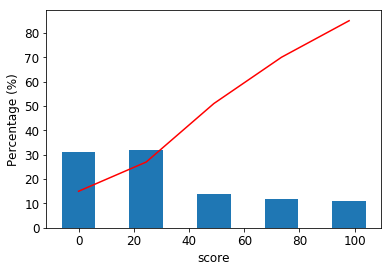

In [4]:
rupPred = RupturaPrediction(X)
rupPred.addFirstPrediction(Y)
rupPred.validate(Ytest, model)
dataScore = rupPred.calculateDataScore()  # passo que define a validacao
rupPred.plotScore(dataScore)

In [5]:
dataScore.to_csv('score-rupt.csv',sep=';')

In [8]:
rupPred = RupturaPrediction(X)
rupPred.addFirstPrediction(Y)
rupPred.validate(Ytest, model)

In [9]:
rupPred.plotAllBatches()

In [5]:
collections.Counter(dataScore.Inadimplente)

Counter({'1': 569, '0': 912})

In [7]:
569/(912+569)

0.38419986495611075

# INDICADORES DO MODELO DESENVOLVIDO

In [60]:
pred = dataScore.score.tolist()
ytrue = dataScore.Inadimplente.tolist()
ytrue = [int(x) for x in ytrue]

In [67]:
modelIndicators = ModelIndicators('0-1-0')
modelIndicators.TARGET_SCORE_CUT = 70

In [68]:
modelIndicators.setPredProbs(ytrue,pred)

In [69]:
modelIndicators.allIndicators()

,Model
accuracy,0.725186
errorsChoseTrue,0.204380
errorsChoseFalse,0.290804
precision,0.795620
recall,0.383128
F1,0.517200
Kappa,0.356479
ROC,0.781306


In [57]:
modelIndicators.confusionMatrix()

array([[856,  56],
       [351, 218]], dtype=int64)

In [95]:
modelIndicators.plotRoc()

In [58]:
56/(218+56)

0.20437956204379562

In [71]:
856+56

912

In [72]:
351+218

569

In [73]:
912/(912+569)

0.6158001350438893

In [59]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

from core.SmartCreditModel import SmartCreditModel
from core.JsonTransforms import JsonTransforms

class ModelIndicators:
    def __init__(self, version):
        self.TARGET_COLUMN = 'Inadimplente'
        self.TARGET_TRUE_FLAG = 1
        self.TARGET_FALSE_FLAG = 0
        self.TARGET_SCORE_CUT = 0.5
        self.RANDOM_STATE_SPLIT = 30
        self.__CONFUSION_PLOT_NAME = 'confusionPlot-' + version + '.png'
        self.__ROC_PLOT_NAME = 'rocPlot-' + version + '.png'
        self.__deploy = False
        self.__version = version

    def setPredProbs(self, Y, PRED):
        self.__pred = PRED
        self.__predValues = [self._isTargetTrue(x) for x in self.__pred]
        self.__ytrue  = Y

    def _isTargetTrue(self, predProb):
        return 1 if predProb > self.TARGET_SCORE_CUT else 0
    
    def getY(self):
        return self.__ytrue
        
    def getPredProbs(self):
        return self.__pred

    def getPredValues(self):
        return self.__predValues

        
#######################################################################################################################
# INDICATORS
#######################################################################################################################

    def allIndicators(self):
        indic = []
        indic.append(self.accuracy())
        indic.append(self.detectionErrorsTrue())
        indic.append(self.detectionErrorsFalse())
        indic.append(self.precisionTarget())
        indic.append(self.recallTarget())
        indic.append(self.f1())
        indic.append(self.cohenKappa())
        indic.append(self.roc())
        indic = pd.DataFrame(data=indic)
        indic.columns = ['Model']
        indic.index = ['accuracy', 'errorsChoseTrue', 'errorsChoseFalse','precision', 'recall','F1','Kappa', 'ROC']
        return indic

    def accuracy(self):
        return metrics.accuracy_score(self.__ytrue, self.__predValues)

    def detectionErrorsTrue(self):
        conf = self.confusionMatrix()
        return conf[0][1]/(conf[0][1] + conf[1][1])

    def detectionErrorsFalse(self):
        conf = self.confusionMatrix()
        return conf[1][0]/(conf[1][0] + conf[0][0])

    def precisionTarget(self):
        return metrics.precision_score(self.__ytrue, self.__predValues, pos_label=self.TARGET_TRUE_FLAG)

    def recallTarget(self):
        return metrics.recall_score(self.__ytrue, self.__predValues, pos_label=self.TARGET_TRUE_FLAG)
    
    def f1(self):
        return metrics.f1_score(self.__ytrue, self.__predValues, pos_label=self.TARGET_TRUE_FLAG)
    
    def cohenKappa(self):
        return metrics.cohen_kappa_score(self.__ytrue, self.__predValues)
    
    def confusionMatrix(self):
        cMatrix = metrics.confusion_matrix(self.__ytrue, self.__predValues, 
                       labels = [self.TARGET_FALSE_FLAG, self.TARGET_TRUE_FLAG])
        return cMatrix

    
    def plotConfusionMatric(self):
        conf = self.confusionMatrix()
        fig = plt.figure()
        seaPlotTrain = sns.heatmap(conf, square=True, annot=True, cbar=False)
        plt.xlabel('PREDICTED')
        plt.ylabel('TRUE')
        fig.savefig(self.__CONFUSION_PLOT_NAME,dpi=150)    
        plt.close(fig)
    
#######################################################################################################################
# PROBABILITIES INDICATORS
#######################################################################################################################

    def roc(self):
        rocValue, _, _ = self._rocIndicator(self.__ytrue, self.__pred)
        return rocValue

    def _rocIndicator(self, y, predProba):
        fpr, tpr, _ = metrics.roc_curve(y, predProba)
        roc_auc = metrics.auc(fpr, tpr)
        return [roc_auc, fpr, tpr]    

    def plotRoc(self): 
        fig = plt.figure()
        rocValue, fpr, tpr = self._rocIndicator(self.__ytrue, self.__pred)
        self._plotRocCurve(rocValue, fpr, tpr)
        fig.savefig(self.__ROC_PLOT_NAME,dpi=150)    
        plt.close(fig)
  
    def _plotRocCurve(self, roc_auc, fpr, tpr):
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    
    
##################################################################################################################
# SmartCredit
##################################################################################################################
        
    def train(self):
        data = self.readData()
        train, test = self._breakIntoTrainAndTest(data)
        XY = self._breakIntoXandY(train, test)
        self._trainModel(XY)

    def readData(self):
        jsonTransforms = JsonTransforms(self.__version, self.__deploy)
        return jsonTransforms.loadTable()
        
    def bootstrap(self, data):
        train, test = self._breakIntoTrainAndTest(data)
        train = self._resampleData(train)
        test = self._resampleData(test)
        XY = self._breakIntoXandY(train, test)
        self._trainModel(XY)

    def _breakIntoTrainAndTest(self, data):
        train, test = train_test_split(data, test_size=0.2, random_state = self.RANDOM_STATE_SPLIT)
        train = train.reset_index(drop=True)
        test = test.reset_index(drop=True)
        return [train, test]

    def _resampleData(self, data):
        resampleIndexes = []
        nLimit = len(data)-1
        for i in data.index:
            iRand = random.randint(0,nLimit)
            resampleIndexes.append(iRand)
        resampleData = data.loc[resampleIndexes,:].copy()
        resampleData = resampleData.reset_index(drop=True)
        return resampleData
        
    def _breakIntoXandY(self, train, test):
        xtrain = train.drop([self.TARGET_COLUMN],axis=1)
        xtest = test.drop([self.TARGET_COLUMN],axis=1)
        ytrain  = train.loc[:,self.TARGET_COLUMN].copy()
        ytrain = [int(x) for x in ytrain]
        ytest = test.loc[:,self.TARGET_COLUMN].copy()
        ytest = [int(x) for x in ytest]
        X = [xtrain, xtest]
        Y = [ytrain, ytest]
        return [X, Y]
        
    def _trainModel(self, XY):
        X,Y = XY
        xtrain, xtest = X
        ytrain, ytest  = Y
        scModel = SmartCreditModel(self.__version, self.__deploy)
        model = scModel.untrained()
        model.fit(xtrain, ytrain)
        predProbsTrain = model.predict_proba(xtrain)
        predProbsTest = model.predict_proba(xtest)
        PRED = [predProbsTrain, predProbsTest]
        self.setPredProbs(Y, PRED)

    
    
    